In [ ]:
# ordinal Encoding



# Step 1: Import necessary libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Step 2: Load the dataset

In [2]:
dataset = pd.read_csv("housing.csv")

# Step 3: Data Exploration and Preprocessing

In [3]:
# Display the first few rows of the dataset
print(dataset.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
# Handle missing values (if necessary)
# For example, to remove rows with missing values:
dataset.dropna(inplace=True)

In [6]:
dataset["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [7]:
# Convert categorical variables to numeric using one-hot encoding
dataset = pd.get_dummies(dataset, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                                           'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)
dataset

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


# Step 4: Define the target and input features

In [8]:
X = dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 
             'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 
             'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = dataset['price']

# Step 5: Data Splitting

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(436, 13)
(109, 13)
(436,)
(109,)


# Step 6: Linear Regression Modeling

In [10]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 7: Model Evaluation

In [11]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1754318687330.66
Mean Absolute Error: 970043.40
R-squared: 0.65


# Step 8: Visualization

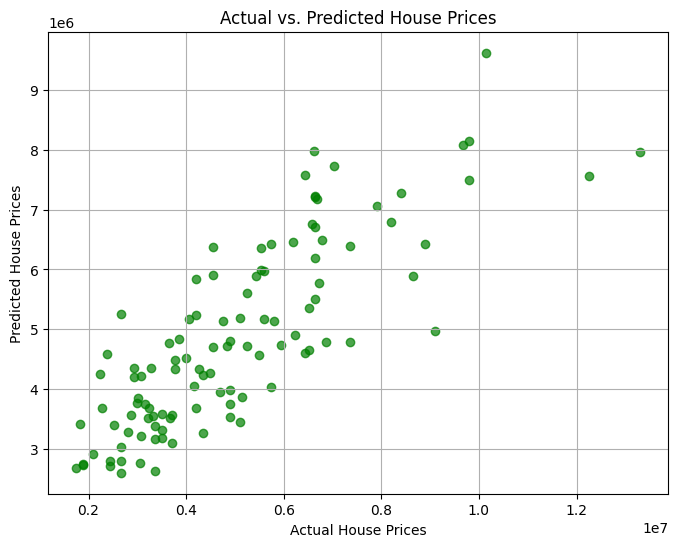

In [26]:
# Step 8: Visualization
# Visualize the actual vs. predicted house prices using a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='g', alpha=0.7)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

# Step 9: Interpretation

In [14]:
# Print the coefficients (slopes) for each feature to understand their impact on the house price
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
area: 235.97
bedrooms: 76778.70
bathrooms: 1094444.79
stories: 407476.59
parking: 224841.91
mainroad_yes: 367919.95
guestroom_yes: 231610.04
basement_yes: 390251.18
hotwaterheating_yes: 684649.89
airconditioning_yes: 791426.74
prefarea_yes: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06
Intercept: 260032.36


Prediction Script to Predict the House Price on Custom Input 

In [15]:
input_data = pd.DataFrame({
    'area': [1500],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [1],
    'parking': [2],
    'mainroad_yes': [1],
    'guestroom_yes': [0],
    'basement_yes': [1],
    'hotwaterheating_yes': [1],
    'airconditioning_yes': [0],
    'prefarea_yes': [1],
    'furnishingstatus_semi-furnished': [1],
    'furnishingstatus_unfurnished': [0]
})

# Predict the price
predicted_price = model.predict(input_data)[0]
predicted_price

5836201.419989705

In [16]:
#create the fucntion for it

In [17]:
# Function to predict house price
def predict_price(area, bedrooms, bathrooms, stories, parking, mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'parking': [parking],
        'mainroad_yes': [1 if mainroad else 0],
        'guestroom_yes': [1 if guestroom else 0],
        'basement_yes': [1 if basement else 0],
        'hotwaterheating_yes': [1 if hotwaterheating else 0],
        'airconditioning_yes': [1 if airconditioning else 0],
        'prefarea_yes': [1 if prefarea else 0],
        'furnishingstatus_semi-furnished': [1 if furnishingstatus == 'semi-furnished' else 0],
        'furnishingstatus_unfurnished': [1 if furnishingstatus == 'unfurnished' else 0]
    })
    # Predict the price
    predicted_price = model.predict(input_data)[0]
    return predicted_price



In [18]:
# Example usage of the prediction function
area = 1500
bedrooms = 3
bathrooms = 2
stories = 2
parking = 2
mainroad = True
guestroom = False
basement = True
hotwaterheating = True
airconditioning = False
prefarea = True
furnishingstatus = 'semi-furnished'

predicted_price = predict_price(area, bedrooms, bathrooms, stories, parking, mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus)
print(f"Predicted Price: {predicted_price:.2f}")

Predicted Price: 6243678.01


Saving Trained Model

In [19]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [20]:
# Loading the model and predicting the house price
housing_model = joblib.load('linear_regression_model.pkl')
input_data = pd.DataFrame({
    'area': [1500],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [1],
    'parking': [2],
    'mainroad_yes': [1],
    'guestroom_yes': [0],
    'basement_yes': [1],
    'hotwaterheating_yes': [1],
    'airconditioning_yes': [0],
    'prefarea_yes': [1],
    'furnishingstatus_semi-furnished': [1],
    'furnishingstatus_unfurnished': [0]
})

# Predict the price
predicted_price = housing_model.predict(input_data)[0]
predicted_price

5836201.419989705

In [28]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [32]:
tips_data = sns.load_dataset("tips")

In [33]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
